<a href="https://colab.research.google.com/github/marce3-2140/Unsupervised-ML-Models/blob/main/Analisys_Customer_Segmentation_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Customer Segmentation**

* Tomado de: [Customer-Segmentation-Kaggle](https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means)

1. Base parte 1.

La tarea es realizar la segmentación del cliente utilizando k-medias Estamos interesados en agrupar a nuestros clientes en grupos con características similares. Esto puede ayudar a la empresa a asignar recursos de marketing de manera eficaz. Utilizaremos la edad del cliente, su educación, sus años de trabajo, sus ingresos, sus deudas, si ha incumplido o no y su deuda a la proporción de ingresos para agruparlos en segmentos.

2. Base Parte 2.

Haz gráficos de barras de los valores medios de cada característica para cada clúster que creaste en la parte 1 de esta asignación.  Cada trazo del eje X debe tener los clústeres, y el eje y debe tener valores medios para cada característica.
Escribe una descripción para cada clúster. Debes basarte en los gráficos y tablas que creaste.


## Librerias

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# librerias
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.style as style
from mpl_toolkits.mplot3d import Axes3D
from termcolor import colored as cl
import matplotlib.cm as cm

#Preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# modelar
from sklearn.cluster import KMeans
# metricas
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

**Cargar Datos**

In [5]:
file = ('/content/drive/MyDrive/CodingDojo/Cargas/No_Supervised/cust_seg.csv')
df = pd.read_csv(file)
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.set_index('Customer Id', inplace = True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


##**I. Analisis Exploratorio de Datos**

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [8]:
df.describe(include='all')

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [10]:
defaulted = df['Defaulted'].isna().sum()
percent_default = (defaulted/len(df))*100
print(f"La columna BMI tiene {percent_default:.2f}% de datos nulos")

La columna BMI tiene 17.65% de datos nulos


In [11]:
#Filtramos los datos inconsistentes para conocer la relacion con otras columnas
nulos = df['Defaulted'] == 1.0
df.loc[nulos,:].head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
3,33,2,10,57,6.111,5.802,1.0,20.9
11,44,3,8,88,0.285,5.083,1.0,6.1
15,28,3,2,20,0.233,1.647,1.0,9.4
23,28,3,6,47,5.574,3.732,1.0,19.8
33,23,2,0,42,1.019,0.619,1.0,3.9


In [12]:
df = df.dropna()

In [14]:
df.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

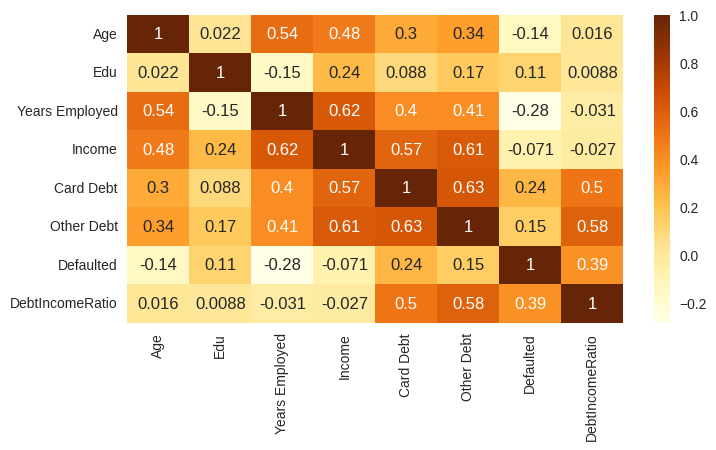

In [20]:
#Identificamos correlaciones entree las columnas
corr = df.corr()
plt.figure(figsize=(8,4)) #Grafico Size
sns.heatmap(corr, cmap='YlOrBr', annot=True); #Creamos el mapa de calor
plt.show();

## **II. Visualizacion de Datos**

<ipython-input-25-0dbc23afc65a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'],


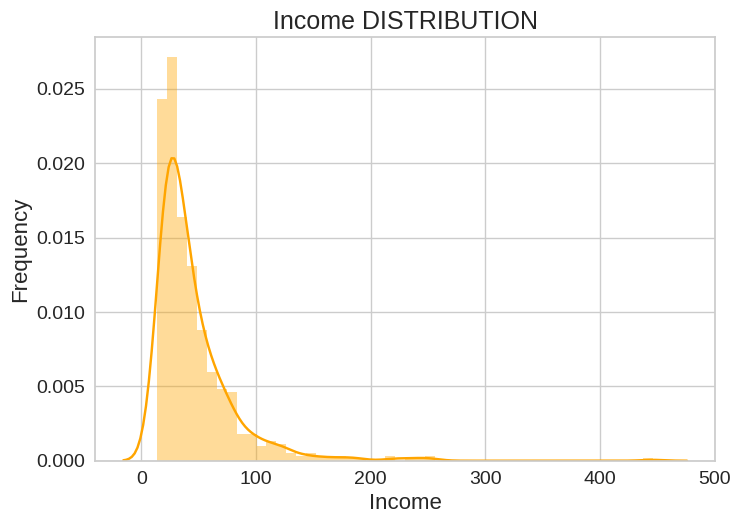

In [25]:
sns.distplot(df['Income'],
             color = 'orange')
plt.title('Income DISTRIBUTION',
          fontsize = 18)
plt.xlabel('Income',
           fontsize = 16)
plt.ylabel('Frequency',
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()

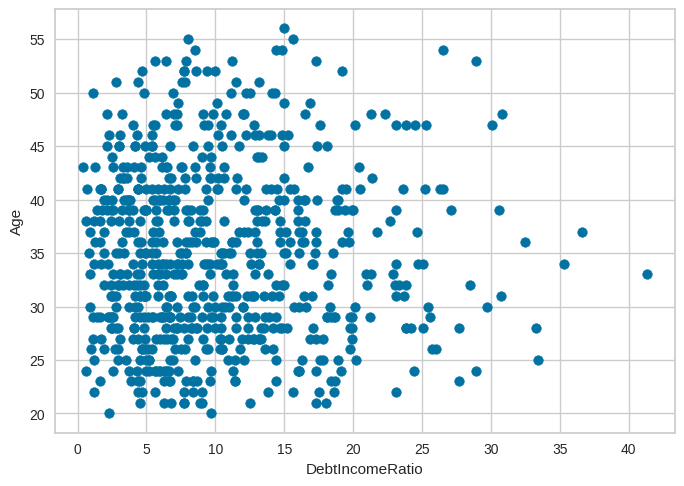

In [24]:
# Visualize data
plt.scatter(df['DebtIncomeRatio'], df['Age'])
plt.xlabel('DebtIncomeRatio')
plt.ylabel('Age');

> Nota: Aunque la correlacion no es muy significativa, a medida que aumneta el DebIncomeRatio disminuy el Incumplimiento.

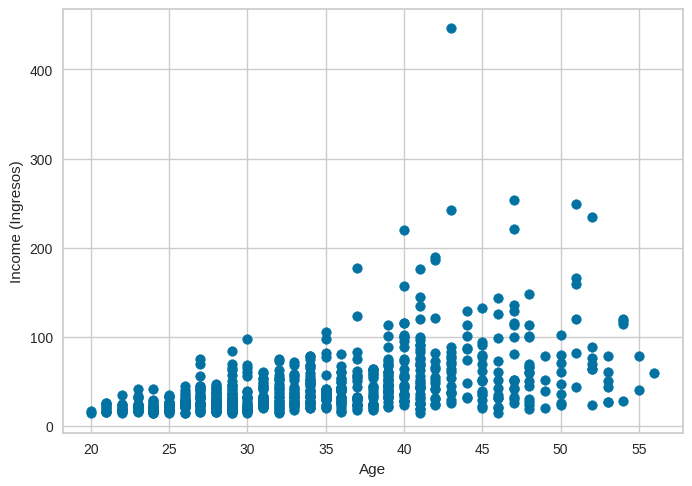

In [26]:
# Visualize data
plt.scatter(df['Age'], df['Income'])
plt.xlabel('Age')
plt.ylabel('Income (Ingresos)');

## **III. Preprocesado**

In [27]:
# Scale the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.768304,0.298793,-0.359007,-0.723102,-0.675699,-0.604284,-0.594950,-0.580528
1,1.519090,-0.779325,2.647029,1.478707,1.431421,1.570620,-0.594950,0.372222
2,-0.232744,0.298793,0.242201,0.309845,2.154119,0.835201,1.680814,1.559495
3,-0.733267,0.298793,-0.659610,-0.723102,-0.412427,-0.773833,-0.594950,-0.580528
4,1.519090,-0.779325,3.398538,5.637681,3.665215,1.780653,-0.594950,-0.448609


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

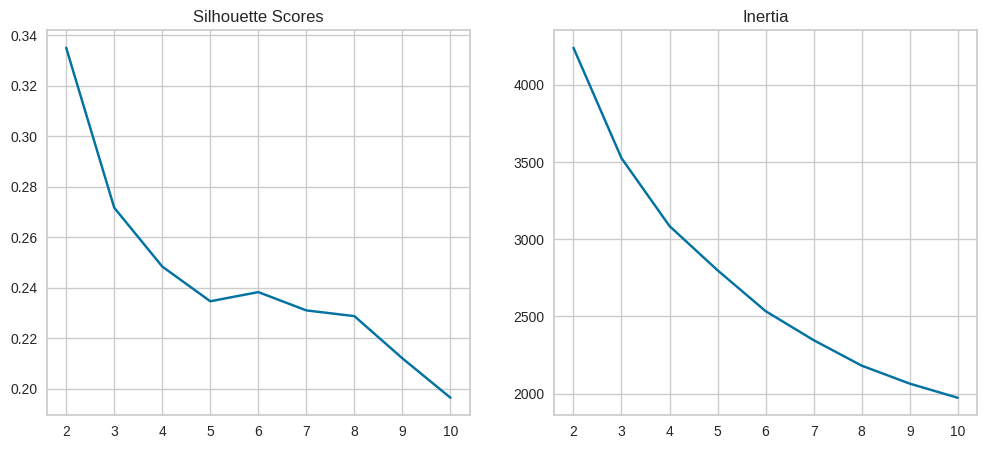

In [28]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

> Nota: El trazado de Silueta nos da el mejor cluster en 2 y el trazado de inercia nos muestra un codo en 3 y 4 clusters.

### **Group the dataframe by 2 cluster**

In [33]:
'''Ajustemos un nuevo modelo con 2 clústeres
   y agreguemos esos clústeres a una nueva columna
    en nuestro dataframe original (sin escala).
'''

# Refit KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,1
2,47,1,26,100,4.582,8.218,0.0,12.8,0
3,33,2,10,57,6.111,5.802,1.0,20.9,0
4,29,2,4,19,0.681,0.516,0.0,6.3,1
5,47,1,31,253,9.308,8.908,0.0,7.2,0


**Los valores medios nos dan la idea del cluster en su conjunto**

In [34]:
#Agruparemos los datos por clúster
#y agregaremos los grupos por los valores medios de cada característica.
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,41.855346,1.955975,15.503145,88.238994,3.886994,7.257063,0.301887,14.754717
1,1,32.804067,1.654344,6.297597,33.070240,0.867771,1.824148,0.249538,8.939741


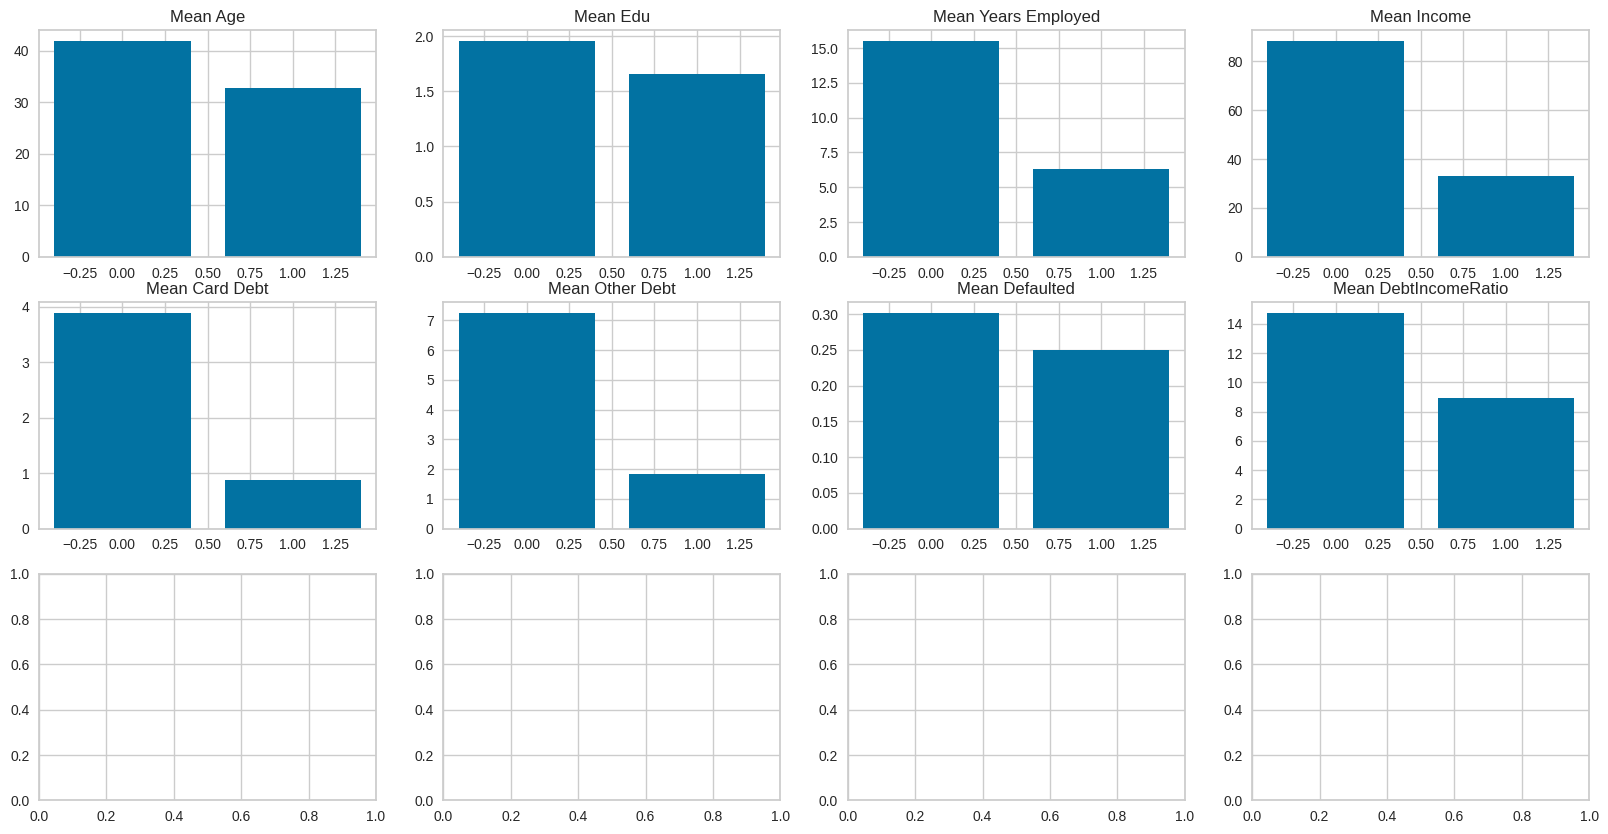

In [35]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

**Analisis de resultados**

* El cluster 0, Nos muestra un rango de edad mas alto que el cluster 1 sobre los 40 años, la educacion sobre 2.0 ligeramente mas alto al cluster 1, los años de emplado mas del doble de los del cluster 1, los ingresos mucho mas altos que los del cluster 1, en general todos los items son mas altos para el cluster 0, tales como el Card Debt, Other Debt, Defaulted y la tasa Ratio de deuda de tarjeta.

* El cluster 0, corresponde a personas posiblemente con mas capacidad de deuda que los del cluster 1.

In [40]:
#Agrupamos los clientes segun las caracteristicas
df.loc[df['cluster']==0].index

Int64Index([  2,   3,   5,  10,  11,  23,  24,  25,  31,  32,
            ...
            762, 785, 793, 794, 802, 809, 822, 827, 831, 850],
           dtype='int64', name='Customer Id', length=159)

### **Group the dataframe by 3 cluster**

In [41]:
'''Ajustemos un nuevo modelo con 3 clústeres
   y agreguemos esos clústeres a una nueva columna
    en nuestro dataframe original (sin escala).
'''

# Refit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,1
2,47,1,26,100,4.582,8.218,0.0,12.8,0
3,33,2,10,57,6.111,5.802,1.0,20.9,2
4,29,2,4,19,0.681,0.516,0.0,6.3,1
5,47,1,31,253,9.308,8.908,0.0,7.2,0


**Los valores medios nos dan la idea del cluster en su conjunto**

In [42]:
#Agruparemos los datos por clúster
#y agregaremos los grupos por los valores medios de cada característica.
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,43.112000,1.960000,16.904000,96.056000,4.172896,7.811616,0.208000,14.398400
1,1,33.727053,1.601449,7.644928,36.246377,0.788126,1.748710,0.000000,7.581884
2,2,31.366460,1.850932,3.689441,30.484472,1.488199,2.734901,0.975155,13.936025


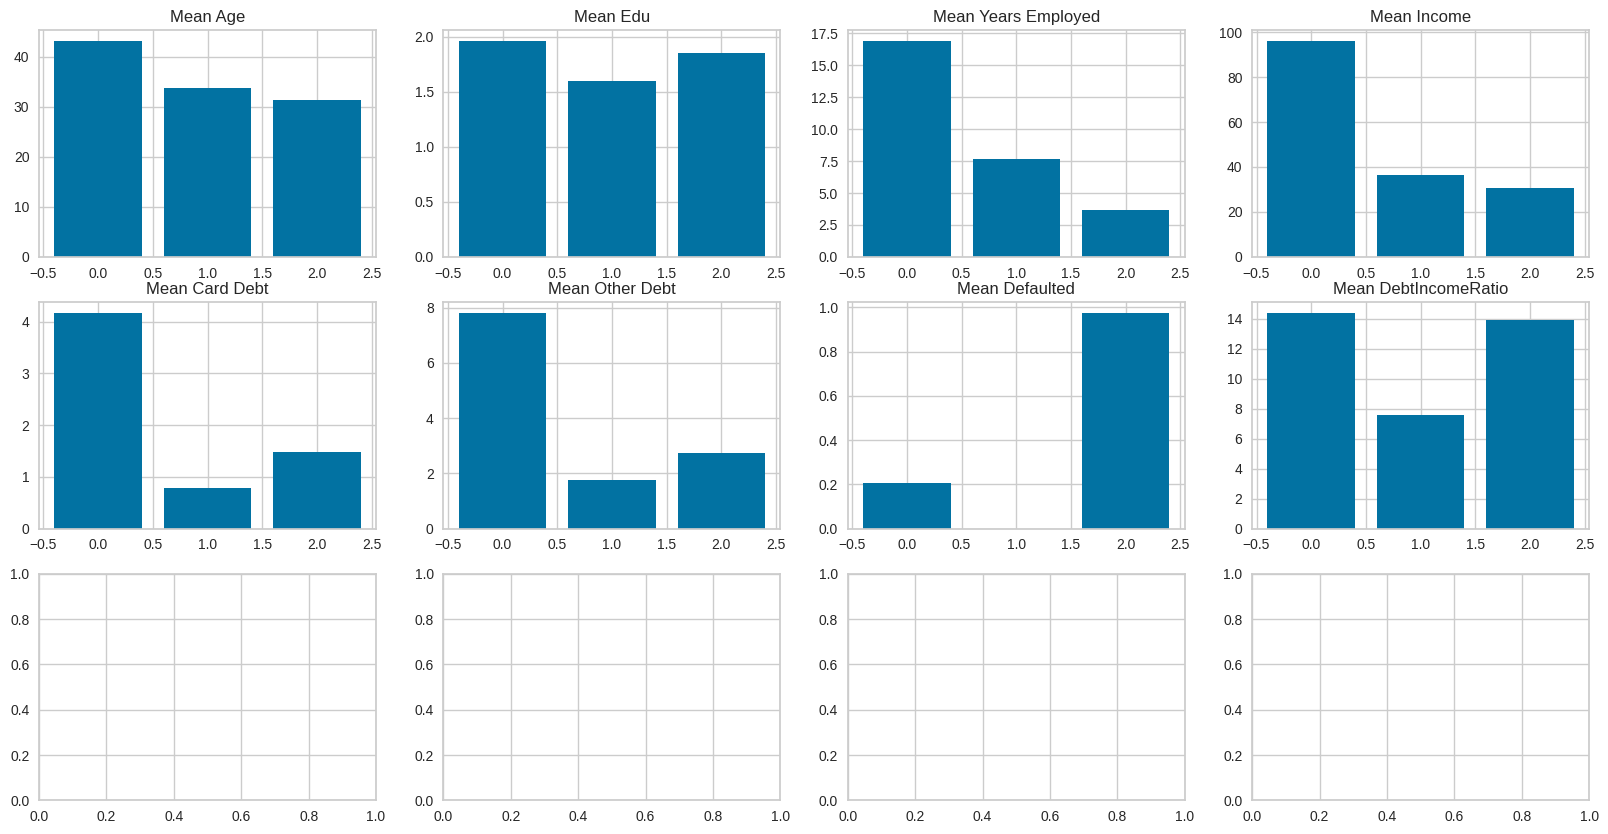

In [43]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

### **Group the dataframe by 4 cluster**

In [45]:
'''Ajustemos un nuevo modelo con 4 clústeres
   y agreguemos esos clústeres a una nueva columna
    en nuestro dataframe original (sin escala).
'''

# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,1
2,47,1,26,100,4.582,8.218,0.0,12.8,3
3,33,2,10,57,6.111,5.802,1.0,20.9,0
4,29,2,4,19,0.681,0.516,0.0,6.3,1
5,47,1,31,253,9.308,8.908,0.0,7.2,2


**Los valores medios nos dan la idea del cluster en su conjunto**

In [46]:
#Agruparemos los datos por clúster
#y agregaremos los grupos por los valores medios de cada característica.
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,31.597561,1.884146,3.859756,31.256098,1.573884,2.811689,0.975610,14.056707
1,1,32.239521,1.640719,5.943114,30.928144,0.667395,1.554440,0.000000,7.590120
2,2,43.125000,2.343750,17.187500,133.062500,7.995750,12.884469,0.593750,19.612500
3,3,41.600000,1.611765,15.905882,71.805882,2.062382,4.400788,0.023529,10.084706


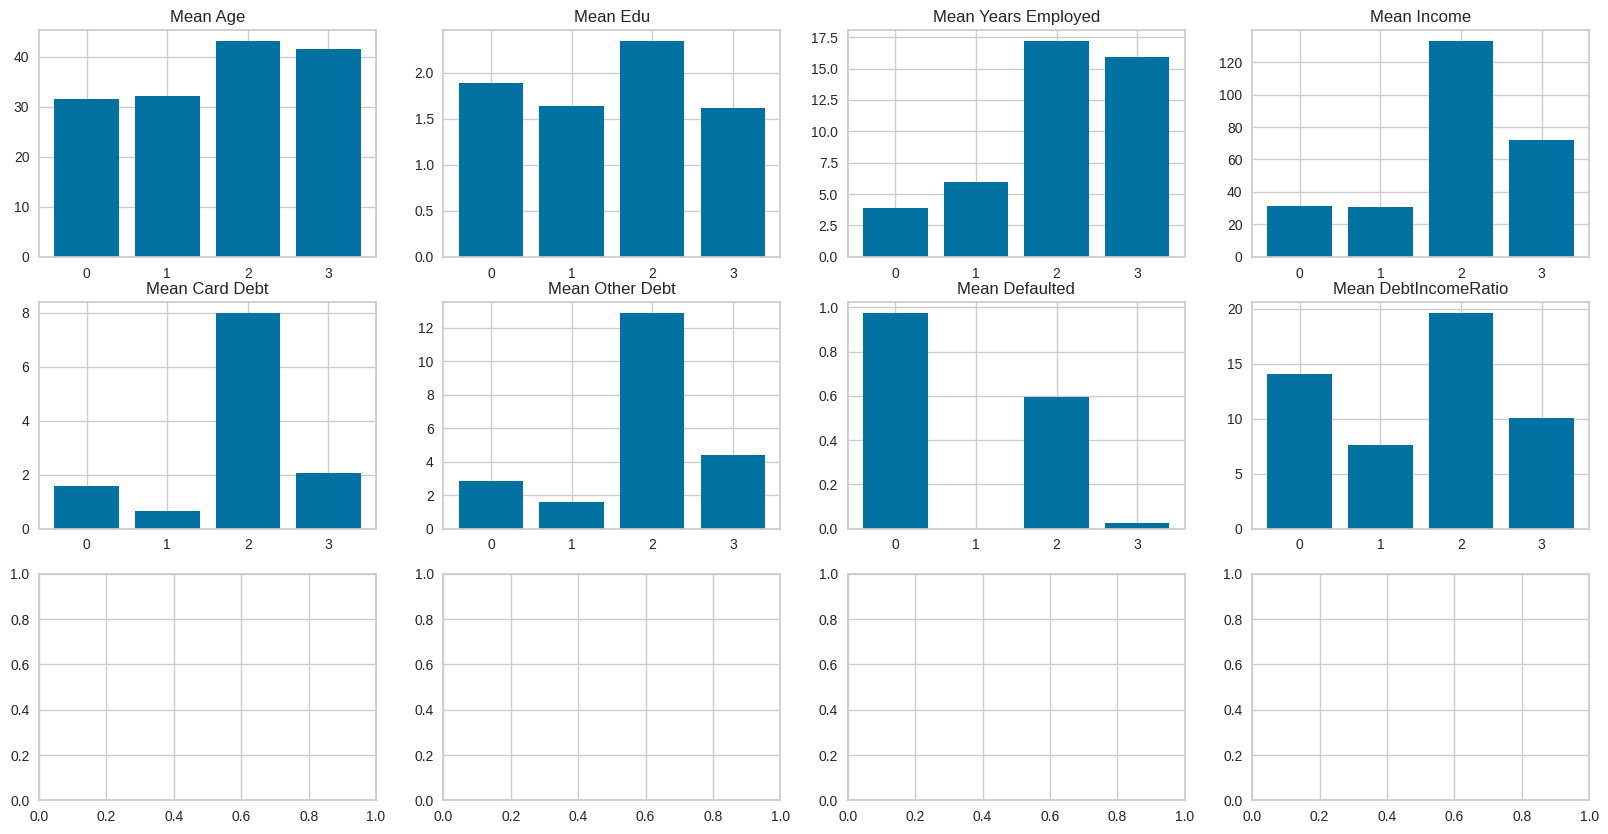

In [47]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

**Analisis de resultados**

* **El cluster 0 y 1,** muestran mala relacion entre los ingresos y la deuda que presentan.

* **El cluster 2,** tiene los mas altos ingresos, los mas altos años de empleado, pero tambien tienen el mas alto ratio de deuda de tarjeta y otra deudas y de defaul.

* **El cluster 3** Muestra mas balance entre indice de ingresos y el indice y ratio de default, tambien presentan el indice de default mas bajos entre todos los clusters, y deuda de tarjeta y otras deudas mas bajas.

* Podriamos concluir que el cluster 3 es el mejor cluster con capacidad de endeudamiento.

In [48]:
#Agrupamos los clientes segun las caracteristicas
df.loc[df['cluster']==3].index

Int64Index([  2,  10,  24,  31,  32,  42,  44,  45,  51,  52,
            ...
            775, 779, 784, 787, 793, 802, 807, 809, 822, 850],
           dtype='int64', name='Customer Id', length=170)